In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Life_Expectancy_00_15.csv", sep = ";")
df.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [3]:
df.shape

(1904, 17)

In [4]:
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Individuals using the Internet', 'Military expenditure',
       'People practicing open defecation',
       'People using at least basic drinking water services',
       'Obesity among adults', 'Beer consumption per capita'],
      dtype='object')

In [5]:
df2 = df._get_numeric_data()
df2.head()

,Year,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,2000,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,2001,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,2002,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,2003,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,2004,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


<AxesSubplot:>

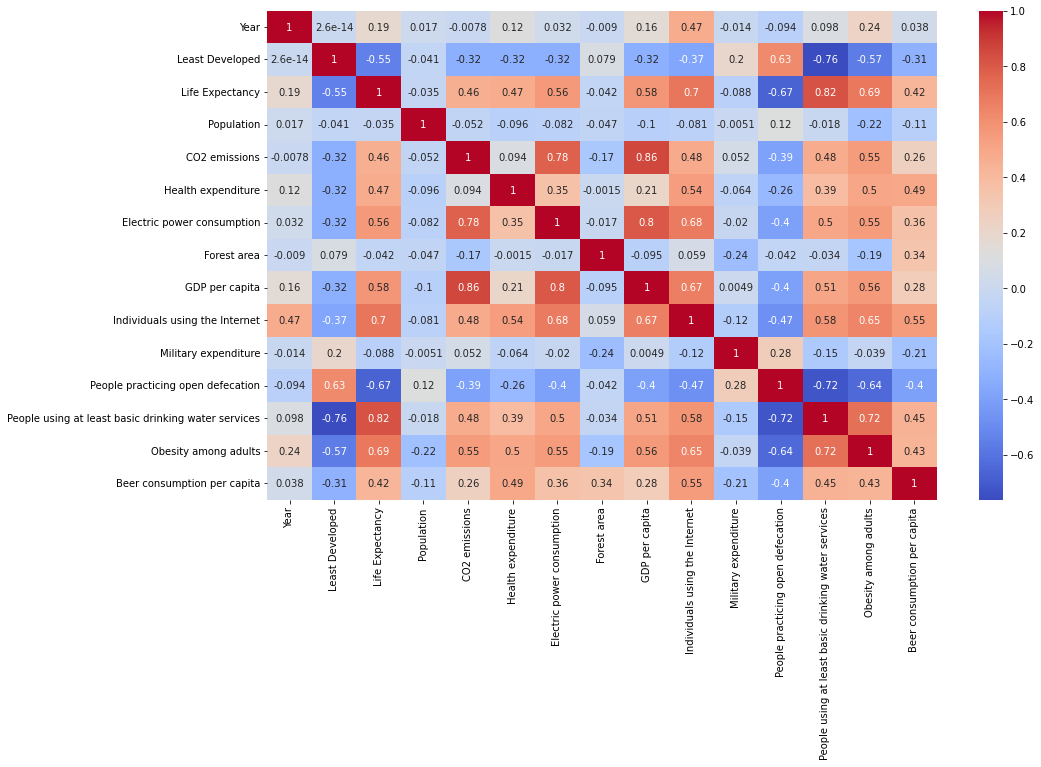

In [31]:
plt.figure(figsize=(15,9))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

From the data we can see that obesity among adults, basic drinking water services and people practicing open defecation have a good correlation with life expectancy

In [7]:
df2[["Obesity among adults", "People using at least basic drinking water services", \
     "People practicing open defecation", "Life Expectancy" ]].corr()

,Obesity among adults,People using at least basic drinking water services,People practicing open defecation,Life Expectancy
Obesity among adults,1.000000,0.724047,-0.641666,0.694936
People using at least basic drinking water services,0.724047,1.000000,-0.722295,0.823990
People practicing open defecation,-0.641666,-0.722295,1.000000,-0.668292
Life Expectancy,0.694936,0.823990,-0.668292,1.000000


The feature "people using at least basic drinking water services" has the best correlation hence we can use it to predict Life Expectancy

In [8]:
x = np.array(df2[["People using at least basic drinking water services"]])
y = np.array(df2["Life Expectancy"])

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)
print(np.shape(x_train))
print(np.shape(y_test))

(1523, 1)
(381,)


## Developing prediction models

### 1. Simple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# applying k-fold cv
from sklearn.model_selection import cross_val_score
# training data
score_train = cross_val_score(model, x_train, y_train, cv = 10)
print(score_train)
# average score
print("The mean R^2 score is", np.mean(score_train))

[0.67340734 0.69363235 0.66898771 0.78426762 0.70617681 0.69604918
 0.63052792 0.62450844 0.63375049 0.56166969]
The mean R^2 score is 0.667297754462864


In [10]:
# test data
score_test = cross_val_score(model, x_test, y_test, cv = 10)
print(score_test)
# average score
print("The mean R^2 score is", np.mean(score_test))

[0.61872215 0.79036718 0.59256466 0.83479637 0.80625922 0.59937115
 0.76713603 0.53709904 0.78307548 0.73805939]
The mean R^2 score is 0.7067450660744053


Printing out predictions

In [11]:
from sklearn.model_selection import cross_val_predict
# using training data
yhat_train = cross_val_predict(model, x_train, y_train, cv = 10)
print(yhat_train[0:20])

[74.46136993 73.06178564 74.69462885 75.75141622 57.64280994 75.94660537
 75.94660537 69.50829355 48.43618626 71.99893689 62.31894747 61.69780633
 75.64792802 75.9221848  75.65596437 74.85389114 55.6845718  73.43831311
 75.32456249 75.94660444]


In [12]:
# using test data
yhat_test = cross_val_predict(model, x_test, y_test, cv = 10)
print(yhat_test[0:20])

[76.41347488 74.90613394 63.19802282 76.41347558 75.49639276 76.4134749
 73.41323647 72.11489027 71.56611127 74.42616265 74.64302204 75.44790435
 75.60144367 69.26989655 76.21284775 73.58493017 75.87795503 76.17986402
 71.7626944  59.34539494]


Text(0, 0.5, 'Life Expectancy')

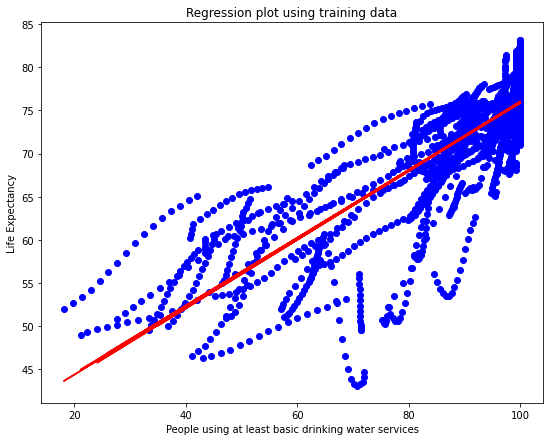

In [13]:
# regression plot of training data
width, height = 9,7
plt.figure(figsize=(width,height))
plt.scatter(x = "People using at least basic drinking water services", y = "Life Expectancy", color = "b", data = df2)
plt.plot(x_train, yhat_train, color = "r")
plt.title("Regression plot using training data")
plt.xlabel("People using at least basic drinking water services")
plt.ylabel("Life Expectancy")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


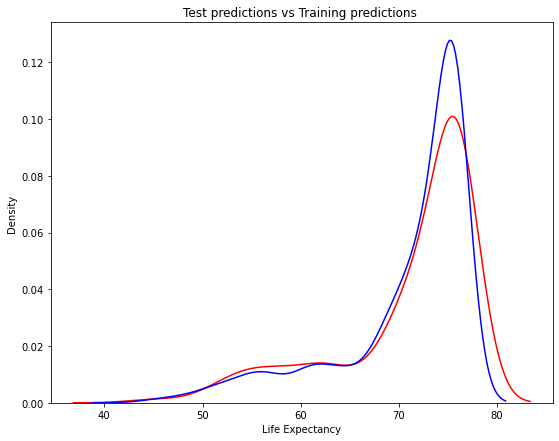

In [14]:
# distribution plot
plt.figure(figsize = (width, height))
ax1 = sns.distplot(x = yhat_test, color = "r", hist = False, label = "Test predictions")
sns.distplot(x = yhat_train, hist = False, color = "b", label = "Training predictions", ax = ax1)
plt.title("Test predictions vs Training predictions ")
plt.xlabel("Life Expectancy")
plt.show()

We can see from the distribution plot that our SLR model does not work well for life expectancies above 70 yrs. We can try deploying a polynomial regression model.

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

# using training data
xtrain_poly = poly.fit_transform(x_train)

# appllying k-fold cv
score_train2 = cross_val_score(model, xtrain_poly, y_train, cv = 10)
print(score_train2)
print("The mean R^2 score is", np.mean(score_train2))

[0.7563752  0.73953799 0.74198173 0.77825207 0.73447989 0.71972257
 0.66610816 0.69205232 0.71680272 0.64127686]
The mean R^2 score is 0.7186589523391563


In [16]:
# using test data
xtest_poly = poly.fit_transform(x_test)

# applying k-fold cv
score_test2 = cross_val_score(model, xtest_poly, y_test, cv = 10)
print(score_test2)
print("Average R^2 score is", np.mean(score_test2))

[0.66613459 0.83600983 0.69081816 0.840163   0.82005644 0.67815856
 0.72120841 0.62804274 0.77615407 0.76876658]
Average R^2 score is 0.7425512373506509


Printing out predictions

In [17]:
# trining data
yhat_train2 = cross_val_predict(model, xtrain_poly, y_train, cv = 10 )
print(yhat_train2[0:20])

[74.60458527 72.09439354 75.05037726 77.17263649 57.83877358 77.5834404
 77.5834404  66.87993248 53.99356993 70.36824608 60.29510651 59.90940393
 76.95724638 77.53171646 76.97391277 75.35938778 57.0233271  72.74253551
 76.29491107 77.58343845]


In [18]:
# test data
yhat_test2 = cross_val_predict(model, xtest_poly, y_test, cv = 10)
print(yhat_test2[0:20])

[77.86369927 75.01819277 60.87377665 77.86370065 76.09903052 77.86369931
 72.46874784 70.45593781 69.65949987 74.17017349 74.54993551 76.00864102
 76.2958533  66.65440826 77.46861287 72.74887771 76.82045384 77.40414821
 69.94118447 58.44316823]


Text(0, 0.5, 'Life Expectancy')

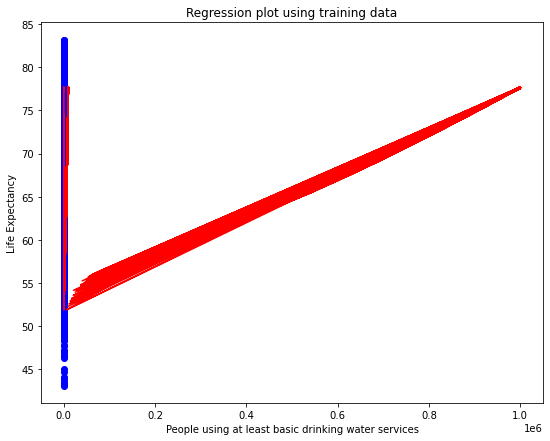

In [19]:
# regression plot of training data 

plt.figure(figsize=(width, height))
plt.scatter(x = "People using at least basic drinking water services", y = "Life Expectancy", color = "b", data = df2)
plt.plot(xtrain_poly, yhat_train2, color = "r")
plt.title("Regression plot using training data")
plt.xlabel("People using at least basic drinking water services")
plt.ylabel("Life Expectancy")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


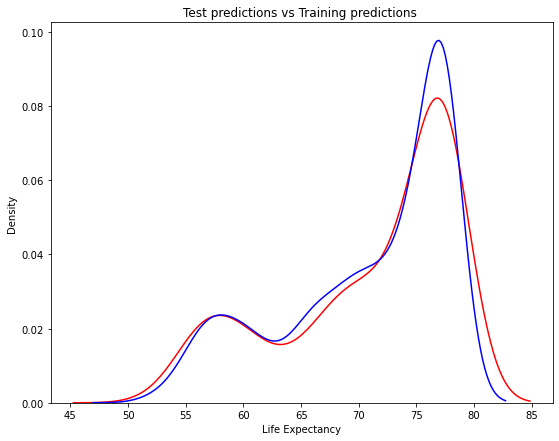

In [20]:
# distribution plot

plt.figure(figsize = (width, height))
ax1 = sns.distplot(x = yhat_test2, color = "r", hist = False, label = "Test predictions")
sns.distplot(x = yhat_train2, hist = False, color = "b", label = "Training predictions", ax = ax1)
plt.title("Test predictions vs Training predictions ")
plt.xlabel("Life Expectancy")
plt.show()

Lets compare this with multiple linear regression

In [21]:
df2[["Obesity among adults", "People using at least basic drinking water services", \
     "People practicing open defecation", "Life Expectancy" ]].corr()

,Obesity among adults,People using at least basic drinking water services,People practicing open defecation,Life Expectancy
Obesity among adults,1.000000,0.724047,-0.641666,0.694936
People using at least basic drinking water services,0.724047,1.000000,-0.722295,0.823990
People practicing open defecation,-0.641666,-0.722295,1.000000,-0.668292
Life Expectancy,0.694936,0.823990,-0.668292,1.000000


In [22]:
z = np.array(df2[["Obesity among adults", "People using at least basic drinking water services", \
                 "People practicing open defecation"]])
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.20, random_state=1)
print(np.shape(z_train))
print(np.shape(y_test))

(1523, 3)
(381,)


In [23]:
# trining data
ztrain_poly = poly.fit_transform(z_train)

# applying k-fold cv
ztrain_score = cross_val_score(model,ztrain_poly, y_train, cv = 10)
print(ztrain_score)
# average score
print(np.mean(ztrain_score))

[0.79965714 0.78721882 0.75558625 0.83860532 0.7956934  0.79947026
 0.72256085 0.78787723 0.76300613 0.68398369]
0.7733659089589142


In [32]:
# test data
ztest_poly = poly.fit_transform(z_test)

# pplying k-fold cv
ztest_score = cross_val_score(model, ztest_poly, y_test, cv = 10)
print(ztest_score)
# average score
print(np.mean(ztest_score))

[0.68088727 0.82385916 0.70500959 0.84290749 0.86292923 0.71652611
 0.85638078 0.65976124 0.88393831 0.79033522]
0.782253440160382


Printing outputs

In [33]:
# training data
yhat_train3 = cross_val_predict(model, ztrain_poly, y_train, cv = 10)
print(yhat_train3[0:20])

[74.81117257 72.06126813 75.09579174 77.03699656 69.5204307  77.9098955
 77.92749273 68.30901883 53.39073538 70.60952162 63.98524344 63.23998965
 77.27571301 77.95657802 77.26675976 75.43011058 54.2927386  72.70783662
 77.16942353 78.05054788]


In [34]:
# test data
yhat_test3 = cross_val_predict(model, ztest_poly, y_test, cv = 10)
print(yhat_test3[0:20])

[77.76259551 71.04933253 63.26099235 78.47059345 74.70405118 77.50427797
 73.67958106 69.96203575 69.23622189 74.50168684 74.88571093 78.19778187
 75.78663353 64.83054671 77.65185144 71.95017989 76.89750968 76.90843298
 70.23791862 58.12973008]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


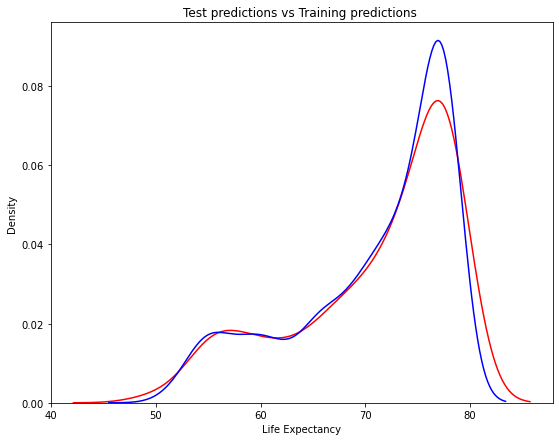

In [35]:
# distrbution plot
plt.figure(figsize = (width, height))
ax1 = sns.distplot(x = yhat_test3, color = "r", hist = False, label = "Test predictions")
sns.distplot(x = yhat_train3, hist = False, color = "b", label = "Training predictions", ax = ax1)
plt.title("Test predictions vs Training predictions ")
plt.xlabel("Life Expectancy")
plt.show()